### Generating the data

/home/matheus/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


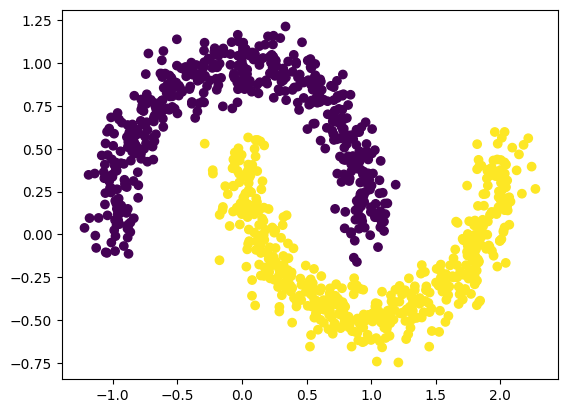

In [1]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import torch
import pandas as pd
from torch import nn
from helper_functions import plot_predictions, plot_decision_boundary
from sklearn.datasets import make_moons

# Generating the dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Turning the data in to tensors
X, y = torch.from_numpy(X).type(torch.float), torch.from_numpy(y).type(torch.float)

# Spliting the dataset in training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(x=X[:, 0], y=X[:, 1], c=y)
plt.show()

### Making the model

In [2]:
class MoonDetection(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.sequence = nn.Sequential(
            nn.Linear(2, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.sequence(x)

model_2 = MoonDetection()
model_2

MoonDetection(
  (sequence): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=1, bias=True)
  )
)

### Training the model

In [6]:
# Setting the loss function
loss_fn = nn.BCEWithLogitsLoss()

# Setting the obtimizer as SGD
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.2)


### Training
epochs = 1000
model_2.eval()
ls = []
for epoch in range(epochs):
    # 1. Forward
    pred = model_2(X_train).squeeze()

    # 2. Loss
    loss = loss_fn(pred, y_train)
    ls.append(float(loss))

    # 3. Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch:<5d}  | Loss: {float(loss):.5f}')

Epoch 0      | Loss: 0.69805
Epoch 100    | Loss: 0.17936
Epoch 200    | Loss: 0.07672
Epoch 300    | Loss: 0.03200
Epoch 400    | Loss: 0.01841
Epoch 500    | Loss: 0.01271
Epoch 600    | Loss: 0.00967
Epoch 700    | Loss: 0.00780
Epoch 800    | Loss: 0.00655
Epoch 900    | Loss: 0.00563


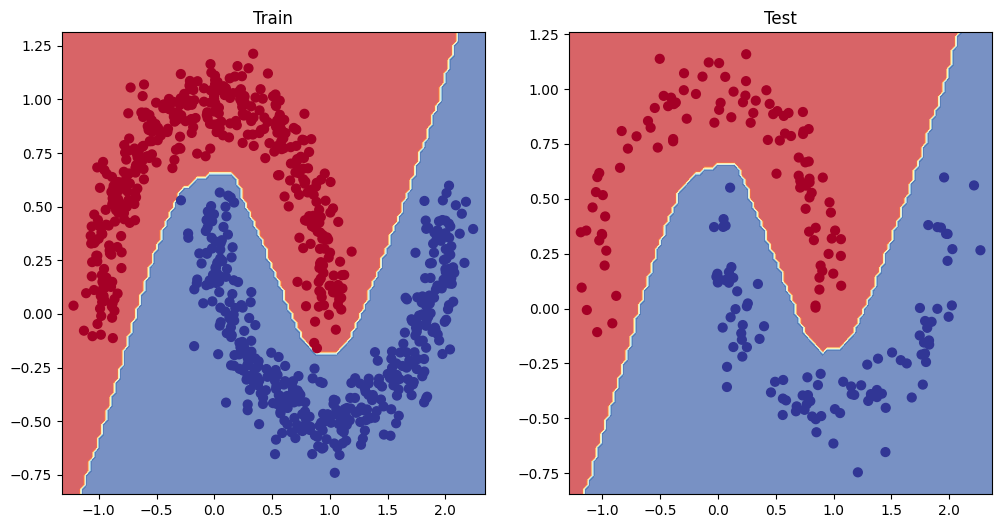

In [7]:
# Ploting the decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_2, X_test, y_test)